### 1. Importing the necessary libraries

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import ta  # Technical Analysis Library
#import pynance as pn  # Financial metrics with PyNance


In [19]:
# Load your data into a pandas DataFrame
file_path = '../data/AAPL_historical_data.csv'  
data = pd.read_csv(file_path)

# Ensure data includes necessary columns
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


In [20]:
# Convert 'Date' column to datetime and sort the DataFrame
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values('Date').reset_index(drop=True)

# Set 'Date' as the index
data.set_index('Date', inplace=True)



### 3. Technical Indicators using the `ta` library

In [21]:
# Simple Moving Averages (SMA)
data['SMA_50'] = ta.trend.sma_indicator(close=data['Close'], window=50)
data['SMA_200'] = ta.trend.sma_indicator(close=data['Close'], window=200)

# Relative Strength Index (RSI)
data['RSI_14'] = ta.momentum.rsi(close=data['Close'], window=14)

# Moving Average Convergence Divergence (MACD)
macd = ta.trend.MACD(close=data['Close'])
data['MACD'] = macd.macd()
data['MACD_Signal'] = macd.macd_signal()

# Calculate daily stock returns
data['Returns'] = data['Close'].pct_change()



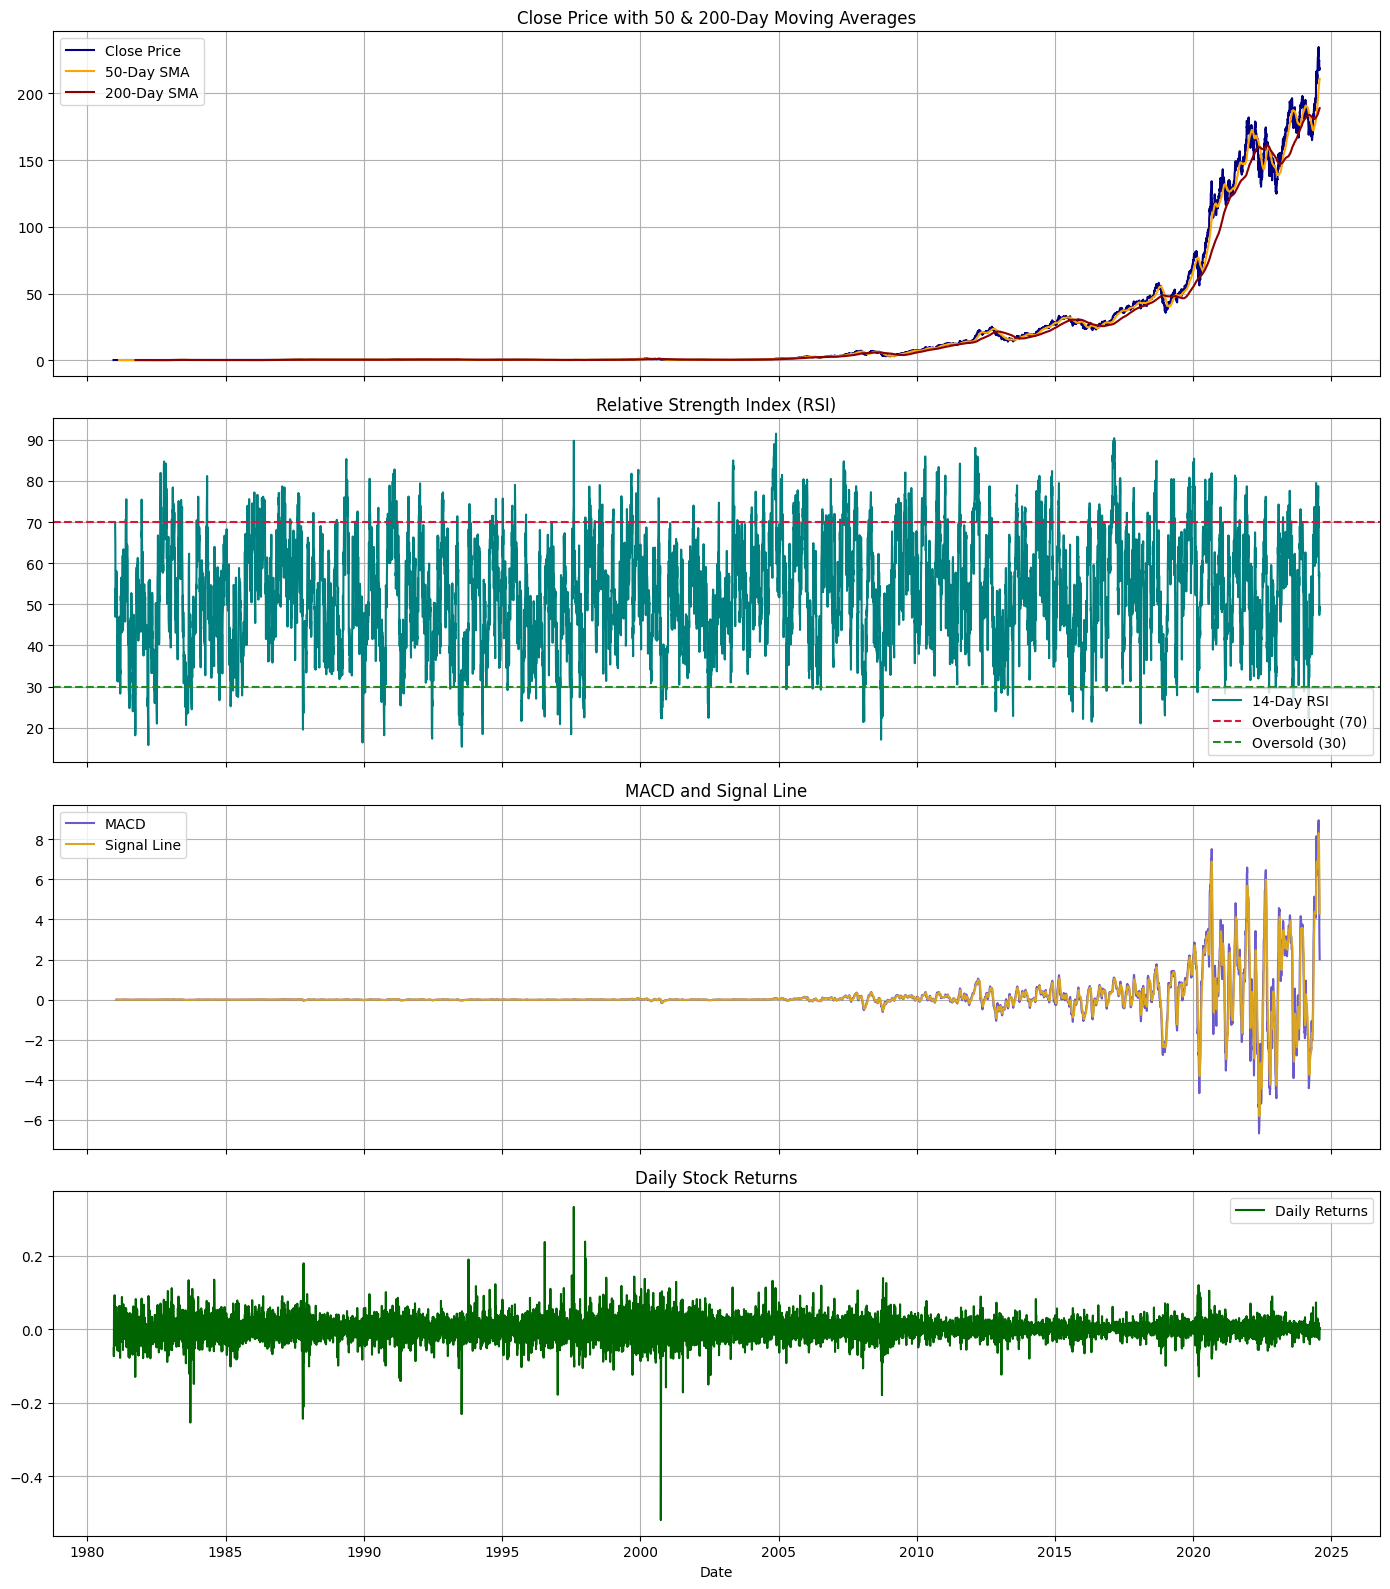

In [22]:
# Create a single figure with subplots
fig, axs = plt.subplots(4, 1, figsize=(14, 16), sharex=True)

#  Close Price and Moving Averages
axs[0].plot(data['Close'], label='Close Price', color='navy')
axs[0].plot(data['SMA_50'], label='50-Day SMA', color='orange')
axs[0].plot(data['SMA_200'], label='200-Day SMA', color='darkred')
axs[0].set_title('Close Price with 50 & 200-Day Moving Averages')
axs[0].legend()
axs[0].grid(True)

#  RSI
axs[1].plot(data['RSI_14'], label='14-Day RSI', color='teal')
axs[1].axhline(70, color='crimson', linestyle='--', label='Overbought (70)')
axs[1].axhline(30, color='forestgreen', linestyle='--', label='Oversold (30)')
axs[1].set_title('Relative Strength Index (RSI)')
axs[1].legend()
axs[1].grid(True)

#  MACD and Signal Line
axs[2].plot(data['MACD'], label='MACD', color='slateblue')
axs[2].plot(data['MACD_Signal'], label='Signal Line', color='goldenrod')
axs[2].set_title('MACD and Signal Line')
axs[2].legend()
axs[2].grid(True)

#  Daily Returns
axs[3].plot(data['Returns'], label='Daily Returns', color='darkgreen')
axs[3].set_title('Daily Stock Returns')
axs[3].legend()
axs[3].grid(True)

# Final layout adjustments
plt.xlabel('Date')
plt.tight_layout()
plt.show()


In [23]:
# Compute daily percentage returns based on the 'Close' price
data['Daily_Returns'] = data['Close'].pct_change()

# Compute cumulative returns over time
data['Cumulative_Returns'] = (1 + data['Daily_Returns']).cumprod()

# Display the first few rows of Close price, daily returns, and cumulative returns
print(data[['Close', 'Daily_Returns', 'Cumulative_Returns']].head())


               Close  Daily_Returns  Cumulative_Returns
Date                                                   
1980-12-12  0.128348            NaN                 NaN
1980-12-15  0.121652      -0.052171            0.947829
1980-12-16  0.112723      -0.073398            0.878261
1980-12-17  0.115513       0.024751            0.899998
1980-12-18  0.118862       0.028992            0.926092


In [24]:
# Example: Estimate the future value of a savings account
# Formula: FV = Initial_Amount * (1 + Interest_Rate) ^ Years

initial_amount = 1500  # Starting savings amount in dollars
interest_rate = 0.04   # Annual interest rate (4%)
years = 8              # Duration in years

future_value = initial_amount * (1 + interest_rate) ** years
print(f"Estimated Future Value after {years} years: ${future_value:.2f}")


Estimated Future Value after 8 years: $2052.85


### 4. AMZN Dataset

In [25]:
#  Load Dataset 
csv_path = '../data/AMZN_historical_data.csv'
df = pd.read_csv(csv_path)

# Display the top rows to confirm structure
print(df.head())



         Date      Open      High       Low     Close  Adj Close      Volume  \
0  1997-05-15  0.121875  0.125000  0.096354  0.097917   0.097917  1443120000   
1  1997-05-16  0.098438  0.098958  0.085417  0.086458   0.086458   294000000   
2  1997-05-19  0.088021  0.088542  0.081250  0.085417   0.085417   122136000   
3  1997-05-20  0.086458  0.087500  0.081771  0.081771   0.081771   109344000   
4  1997-05-21  0.081771  0.082292  0.068750  0.071354   0.071354   377064000   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [26]:
# Data Cleaning & Formatting 
# Convert 'Date' to datetime and arrange by date
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', inplace=True)
df.reset_index(drop=True, inplace=True)

# Set 'Date' as index for time series operations
df.set_index('Date', inplace=True)

In [64]:
# Apply Technical Indicators (via `ta` library) 

# Simple Moving Averages
df['MA_50'] = ta.trend.sma_indicator(close=df['Close'], window=50)
df['MA_200'] = ta.trend.sma_indicator(close=df['Close'], window=200)

# RSI (Relative Strength Index)
df['RSI'] = ta.momentum.rsi(close=df['Close'], window=14)

# MACD and Signal Line
macd_calc = ta.trend.MACD(close=df['Close'])
df['MACD'] = macd_calc.macd()
df['Signal_Line'] = macd_calc.macd_signal()



In [65]:
# import pandas as pd
# import pynance as pn

# Assuming df is already defined as shown in your output
# Wrap DataFrame in pynance for metric calculation
metrics = pn.data(df[['Close']])

# Calculate cumulative returns
df['Cumulative_Return'] = metrics.cumulative_returns()

# Calculate annual volatility (assuming a trading year of 252 days)
df['Annual_Vol'] = metrics.rolling_volatility(window=252)

# Calculate daily returns separately
df['Daily_Return'] = df['Close'].pct_change()

# Display the updated DataFrame
print(df[['Close', 'Cumulative_Return', 'Annual_Vol', 'Daily_Return']])


NameError: name 'pn' is not defined

In [60]:
import pandas as pd
import numpy as np

# Example: make sure your DataFrame has a 'Close' column
# df = pd.read_csv('your_data.csv') or define df earlier

# Calculate daily returns
df['Daily_Return'] = df['Close'].pct_change()

# Calculate cumulative returns
df['Cumulative_Return'] = (1 + df['Daily_Return']).cumprod()

# Calculate rolling (annualized) volatility using a 252-day window
df['Annual_Vol'] = df['Daily_Return'].rolling(window=252).std() * np.sqrt(252)

# Display results
print(df[['Close', 'Cumulative_Return', 'Annual_Vol', 'Daily_Return']])


                 Close  Cumulative_Return  Annual_Vol  Daily_Return
Date                                                               
1980-12-12    0.128348                NaN         NaN           NaN
1980-12-15    0.121652           0.947829         NaN     -0.052171
1980-12-16    0.112723           0.878261         NaN     -0.073398
1980-12-17    0.115513           0.899998         NaN      0.024751
1980-12-18    0.118862           0.926092         NaN      0.028992
...                ...                ...         ...           ...
2024-07-24  218.539993        1702.714537    0.226936     -0.028754
2024-07-25  217.490005        1694.533748    0.226965     -0.004805
2024-07-26  217.960007        1698.195677    0.226936      0.002161
2024-07-29  218.240005        1700.377237    0.226824      0.001285
2024-07-30  218.800003        1704.740356    0.226462      0.002566

[10998 rows x 4 columns]


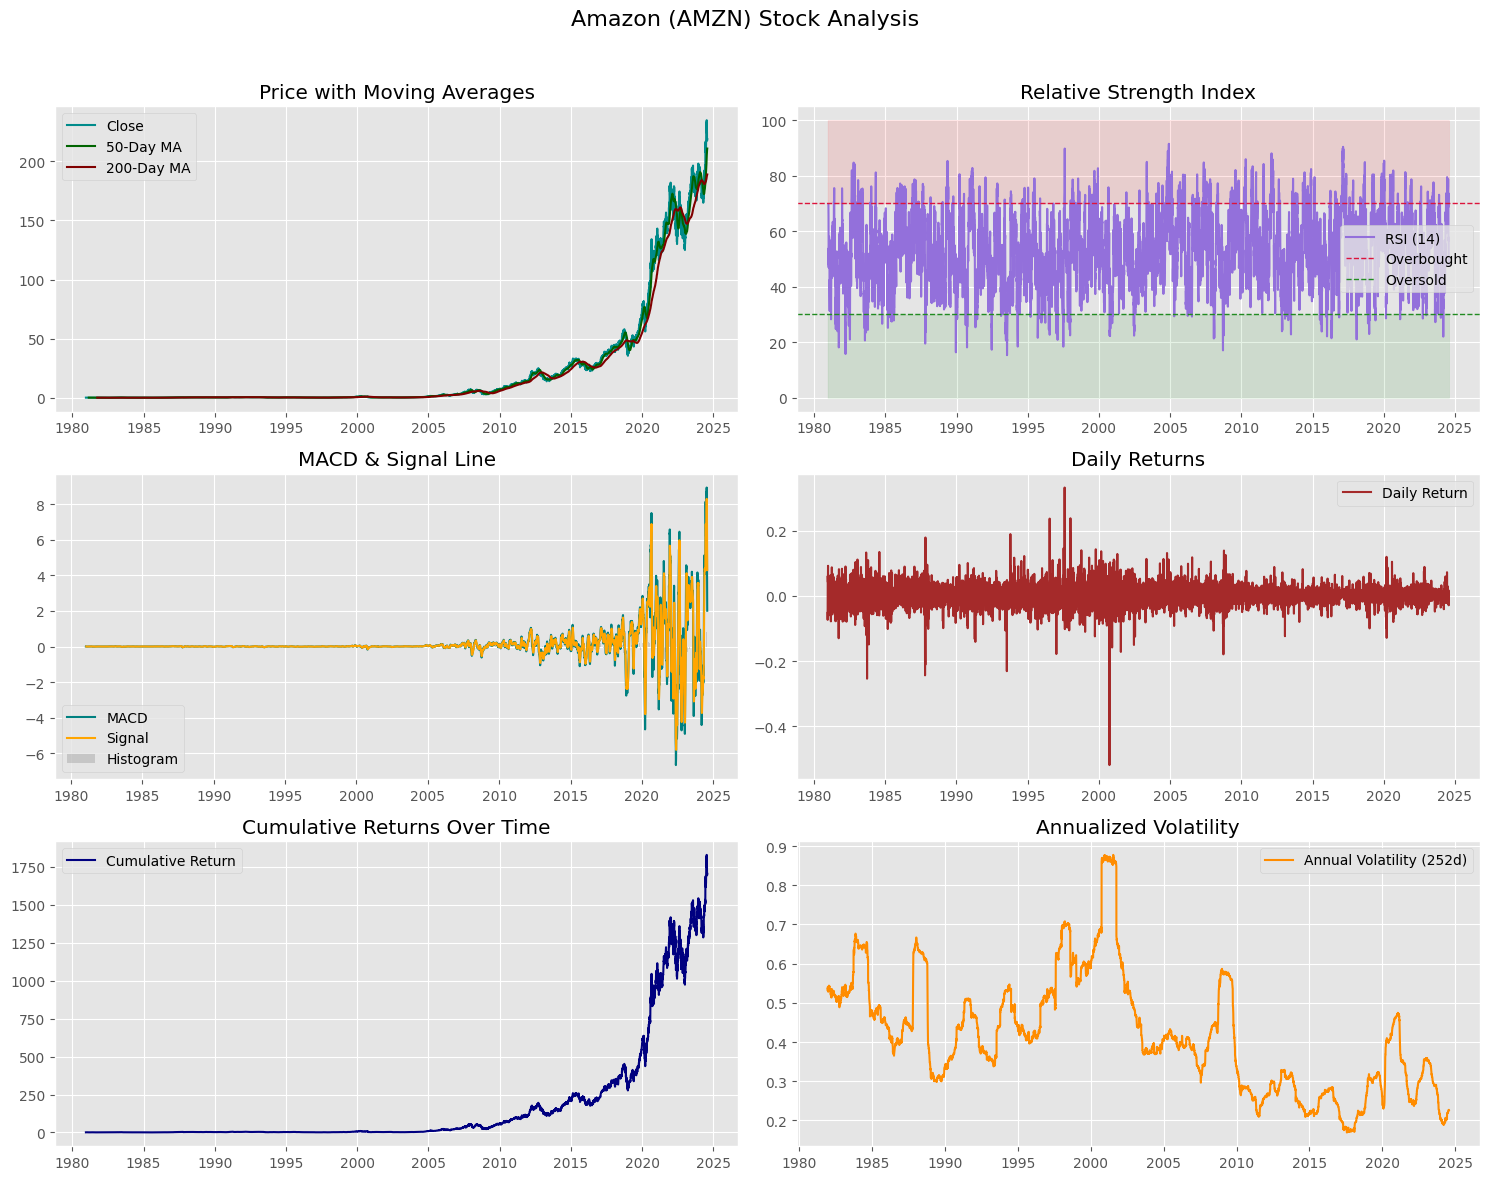

In [66]:
# Visualization 

plt.style.use('ggplot')

# Subplot layout: 3x2 Grid
fig, axs = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle('Amazon (AMZN) Stock Analysis', fontsize=16)

# Close Price + Moving Averages
axs[0, 0].plot(df['Close'], label='Close', color='darkcyan')
axs[0, 0].plot(df['MA_50'], label='50-Day MA', color='darkgreen')
axs[0, 0].plot(df['MA_200'], label='200-Day MA', color='maroon')
axs[0, 0].set_title('Price with Moving Averages')
axs[0, 0].legend()

# RSI Plot
axs[0, 1].plot(df['RSI'], label='RSI (14)', color='mediumpurple')
axs[0, 1].axhline(70, linestyle='--', color='crimson', linewidth=1, label='Overbought')
axs[0, 1].axhline(30, linestyle='--', color='forestgreen', linewidth=1, label='Oversold')
axs[0, 1].fill_between(df.index, 70, 100, color='red', alpha=0.1)
axs[0, 1].fill_between(df.index, 0, 30, color='green', alpha=0.1)
axs[0, 1].set_title('Relative Strength Index')
axs[0, 1].legend()

# MACD & Signal Line
axs[1, 0].plot(df['MACD'], label='MACD', color='teal')
axs[1, 0].plot(df['Signal_Line'], label='Signal', color='orange')
axs[1, 0].bar(df.index, df['MACD'] - df['Signal_Line'], color='grey', alpha=0.3, label='Histogram')
axs[1, 0].set_title('MACD & Signal Line')
axs[1, 0].legend()

# Daily Returns
axs[1, 1].plot(df['Daily_Return'], label='Daily Return', color='brown')
axs[1, 1].set_title('Daily Returns')
axs[1, 1].legend()

# Cumulative Returns
axs[2, 0].plot(df['Cumulative_Return'], label='Cumulative Return', color='navy')
axs[2, 0].set_title('Cumulative Returns Over Time')
axs[2, 0].legend()

# Annual Volatility
axs[2, 1].plot(df['Annual_Vol'], label='Annual Volatility (252d)', color='darkorange')
axs[2, 1].set_title('Annualized Volatility')
axs[2, 1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### 5. AAPL historical Dataset

In [67]:
# Load historical stock data
file_path = '../data/AAPL_historical_data.csv'
df = pd.read_csv(file_path)

# Preview the dataset
print(df.head())



         Date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [68]:
# === Step 2: Data Cleaning & Formatting ===
# Ensure datetime format and chronological order
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)
df.reset_index(drop=True, inplace=True)
df.set_index('Date', inplace=True)

# === Step 3: Technical Indicator Computation ===
# Simple Moving Averages
df['SMA_50'] = ta.trend.sma_indicator(close=df['Close'], window=50)
df['SMA_200'] = ta.trend.sma_indicator(close=df['Close'], window=200)

# Relative Strength Index
df['RSI_14'] = ta.momentum.rsi(close=df['Close'], window=14)

# MACD and Signal Line
macd = ta.trend.MACD(close=df['Close'])
df['MACD'] = macd.macd()
df['MACD_Signal'] = macd.macd_signal()

# === Step 4: Financial Metrics ===
# Daily and cumulative returns
df['Returns'] = df['Close'].pct_change()
df['Cumulative_Returns'] = (1 + df['Returns']).cumprod() - 1

# Annualized Volatility (rolling 252-day window)
df['Annual_Volatility'] = df['Returns'].rolling(window=252).std() * (252 ** 0.5)

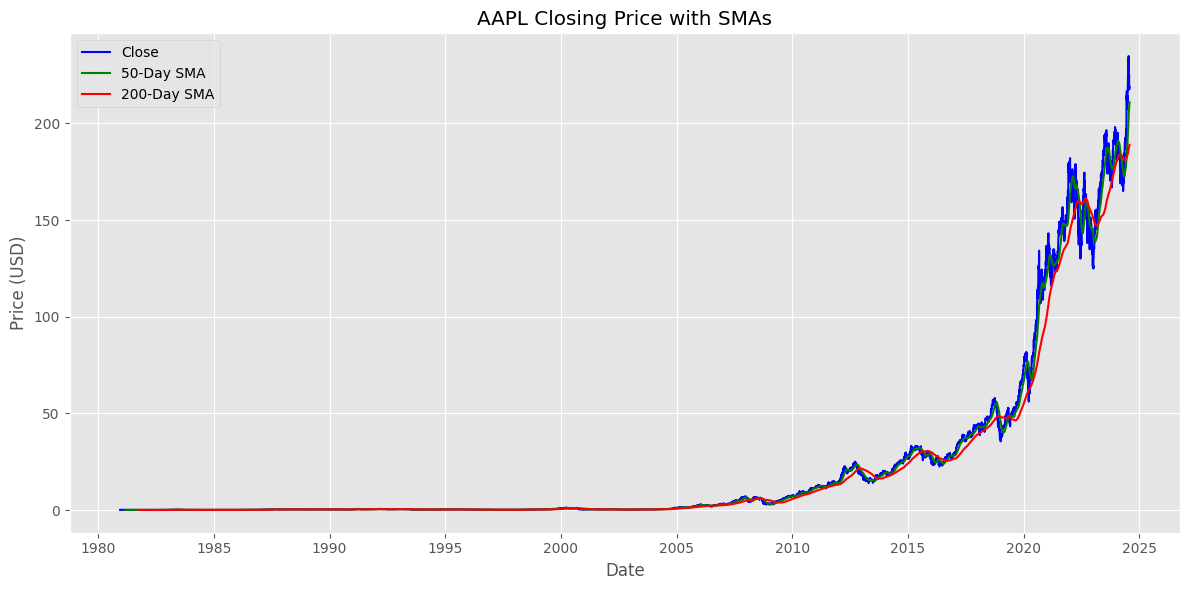

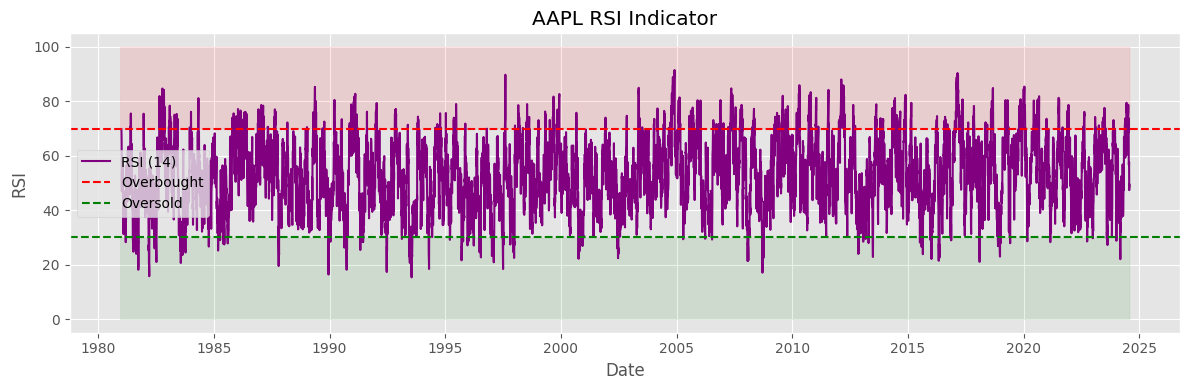

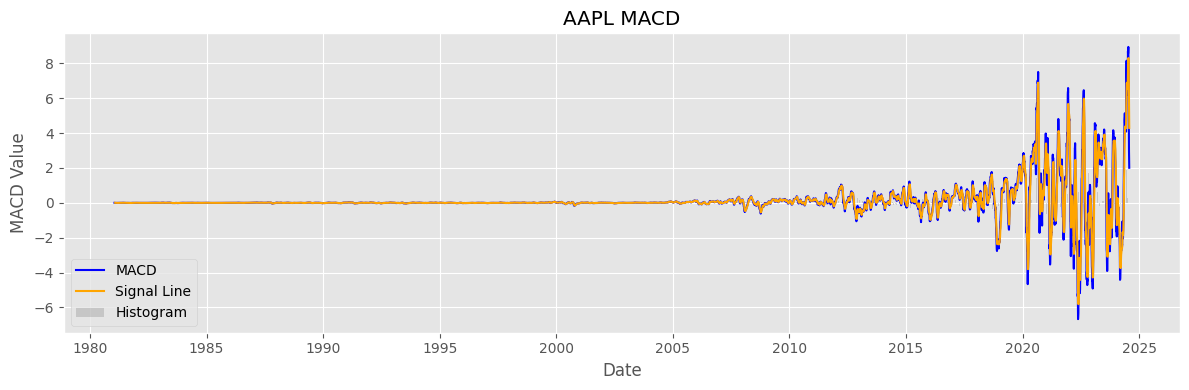

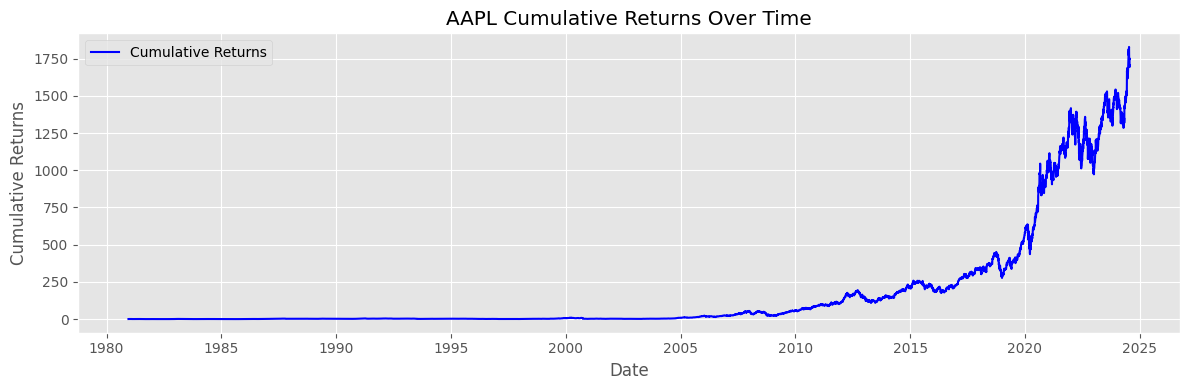

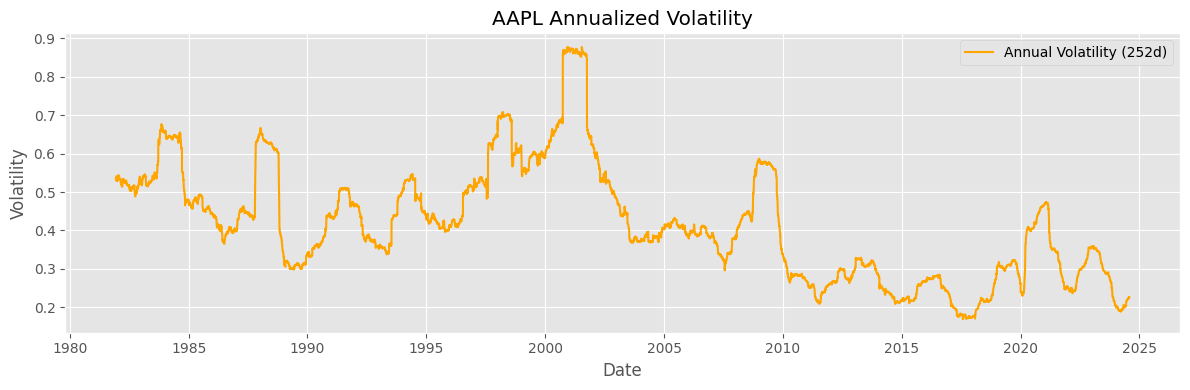

In [69]:
# === Step 5: Visualization ===
plt.style.use('ggplot')

# Plot 1: Closing Price and Moving Averages
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close', color='blue')
plt.plot(df['SMA_50'], label='50-Day SMA', color='green')
plt.plot(df['SMA_200'], label='200-Day SMA', color='red')
plt.title('AAPL Closing Price with SMAs')
plt.xlabel('Date'); plt.ylabel('Price (USD)')
plt.legend(); plt.tight_layout(); plt.show()

# Plot 2: RSI with Overbought/Oversold Zones
plt.figure(figsize=(12, 4))
plt.plot(df['RSI_14'], label='RSI (14)', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought')
plt.axhline(30, color='green', linestyle='--', label='Oversold')
plt.fill_between(df.index, 70, 100, color='red', alpha=0.1)
plt.fill_between(df.index, 0, 30, color='green', alpha=0.1)
plt.title('AAPL RSI Indicator')
plt.xlabel('Date'); plt.ylabel('RSI')
plt.legend(); plt.tight_layout(); plt.show()

# Plot 3: MACD and Signal Line
plt.figure(figsize=(12, 4))
plt.plot(df['MACD'], label='MACD', color='blue')
plt.plot(df['MACD_Signal'], label='Signal Line', color='orange')
plt.bar(df.index, df['MACD'] - df['MACD_Signal'], label='Histogram', color='gray', alpha=0.3)
plt.title('AAPL MACD')
plt.xlabel('Date'); plt.ylabel('MACD Value')
plt.legend(); plt.tight_layout(); plt.show()

# Plot 4: Cumulative Returns
plt.figure(figsize=(12, 4))
plt.plot(df['Cumulative_Returns'], label='Cumulative Returns', color='blue')
plt.title('AAPL Cumulative Returns Over Time')
plt.xlabel('Date'); plt.ylabel('Cumulative Returns')
plt.legend(); plt.tight_layout(); plt.show()

# Plot 5: Annual Volatility
plt.figure(figsize=(12, 4))
plt.plot(df['Annual_Volatility'], label='Annual Volatility (252d)', color='orange')
plt.title('AAPL Annualized Volatility')
plt.xlabel('Date'); plt.ylabel('Volatility')
plt.legend(); plt.tight_layout(); plt.show()


In [70]:
# === Step 6: Summary Statistics ===

# Descriptive statistics for numeric columns
print("=== Summary Statistics ===")
print(df.describe())

# Display latest cumulative returns
print("\n=== Latest Cumulative Returns ===")
print(df['Cumulative_Returns'].dropna().tail())

# Display latest annual volatility values
print("\n=== Latest Annual Volatility ===")
print(df['Annual_Volatility'].dropna().tail())


=== Summary Statistics ===
               Open          High           Low         Close     Adj Close  \
count  10998.000000  10998.000000  10998.000000  10998.000000  10998.000000   
mean      22.299160     22.539055     22.068367     22.312754     21.494496   
std       46.003685     46.496031     45.540929     46.037660     45.561916   
min        0.049665      0.049665      0.049107      0.049107      0.037857   
25%        0.299107      0.303710      0.290179      0.298549      0.241840   
50%        0.531250      0.537946      0.522321      0.531250      0.432079   
75%       20.204196     20.389554     19.998036     20.196160     17.253029   
max      236.479996    237.229996    233.089996    234.820007    234.548523   

             Volume     Dividends  Stock Splits        SMA_50       SMA_200  \
count  1.099800e+04  10998.000000  10998.000000  10949.000000  10799.000000   
mean   3.180806e+08      0.000752      0.001546     21.923676     20.937691   
std    3.354523e+08     